##1. In a new Jupyter Notebook, import pandas and matplotlib.pyplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##2. Scroll through the matplotlib figure examples and pick one style of figure you would like to learn how to create, then in a Markdown cell, explain what kind of data you would like to represent using that figure.

##My answer: I would like to learn stacked bar chart. This is especially useful for dataset with multiple categorical variables. Take cces as an example, I can put nonwhite.index as the x-axis and the frequency of pid3 as the y-axis. This way, I could know if different races may have different political identifications.

##3. Import this file named cces_example_data.csv using pandas.read_csv() to convert it to a DataFrame object
This data already follows tidy data principles
The variables `sex`, `pid3`, `nonwhite`, and `Evaluation` are all categorical variables, the rest can be treated as continuous

In [3]:
cces = pd.read_csv('cces_example_data.csv')
cces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [11]:
cces.shape

(659, 21)

In [17]:
cces['Participant_No']=range(659)
cces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid,Participant_No
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943,0
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315,1
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697,2
3,2,3,1,6,1,76,97,1,3,1.000000,...,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961,3
4,4,5,2,6,1,83,4,1,2,1.000000,...,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601,4


##4. Create and show in your notebook an empty figure that contains two axes
Set the title for the first axis as "Age Histogram"
Set the title for the second axis as "Political Identity"

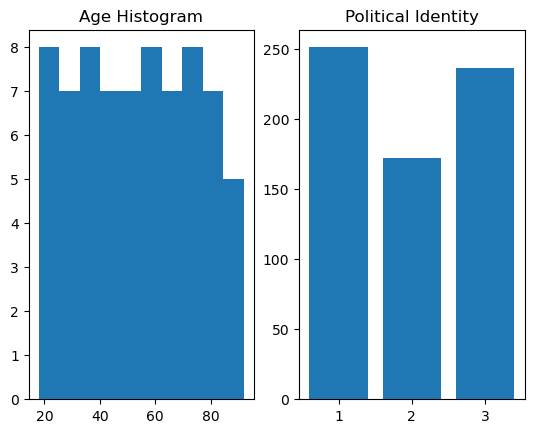

In [97]:
age_freq = cces.groupby('age')['Participant_No'].count()
age_freq.index
pid3_freq = cces.groupby('pid3')['Participant_No'].count()
pid3_freq.index

fig1, ax1 = plt.subplots(1,2)
ax1[0].hist(age_freq.index)
ax1[0].set_title('Age Histogram')
ax1[1].bar(x=pid3_freq.index,height=pid3_freq)
ax1[1].set_title('Political Identity')
plt.show()

##5. In a new code cell, create and show a figure that includes one axis with a bar plot of the `Evaluation` variable

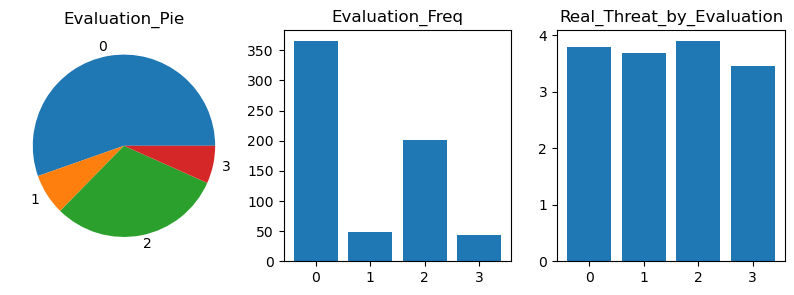

In [112]:
Evaluation_freq = cces.groupby('Evaluation')['Participant_No'].count()
Evaluation_freq.index

fig2, ax2 = plt.subplots(1,3,figsize=(10,3))
ax2[0].pie(Evaluation_freq,labels=Evaluation_freq.index)
ax2[0].set_title('Evaluation_Pie')
ax2[1].bar(Evaluation_freq.index,Evaluation_freq)
ax2[1].set_title('Evaluation_Freq')
ax2[2].bar(Evaluation_freq.index, cces.groupby('Evaluation')['Real_Threat'].mean())
ax2[2].set_title('Real_Threat_by_Evaluation')
plt.show()

##6. In a new code cell, create and show a figure that includes one axis with a scatter plot of the `ConMediaUse` and `ImmiPhobia` variable

Text(0.5, 1.0, 'RT_by_ST')

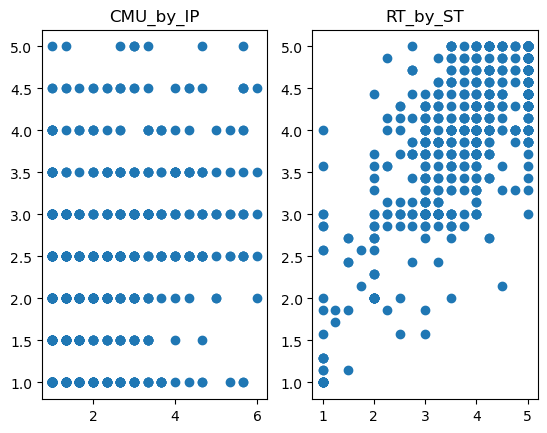

In [130]:
fig3, ax3 = plt.subplots(1,2)
ax3[0].scatter(x=cces['ConMediaUse'],y=cces['ImmiPhobia'])
ax3[0].set_title('CMU_by_IP')
ax3[1].scatter(x=cces['Real_Threat'],y=cces['Symb_Threat'])
ax3[1].set_title('RT_by_ST')